In [5]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50), ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60), ("data science", 60, 70), ("analytics", 90, 3), ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0), ("actionable insights", 40, 30), ("think out of the box", 45, 10), ("self-starter", 30, 50), ("customer focus", 65, 15), ("thought leadership", 35, 35), ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0), ("actionable insights", 40, 30), ("think out of the box", 45, 10), ("self-starter", 30, 50), ("customer focus", 65, 15), ("thought leadership", 35, 35)]

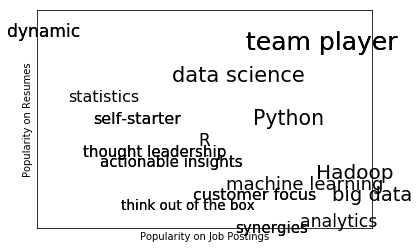

In [6]:
import math, random, re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
def text_size(total):
    return 8 + total / 200 * 20

for word, job_pop, res_pop in data:
    plt.text(job_pop, res_pop, word, ha='center', va='center', size = text_size(job_pop + res_pop))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
def fix_unicode(text):
     return text.replace(u"\u2019", "'")
def get_document():
    url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')

    content = soup.find("div", "article-body")         # find article-body div
    regex = r"[\w']+|[\.]"                             # matches a word or a period

    document = []

 
    for paragraph in content("p"):
        words = re.findall(regex, fix_unicode(paragraph.text))
        document.extend(words)

    return document
document=get_document()
document

["We've",
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 "O'Reilly",
 'said',
 'that',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'data',
 'driven',
 'apps',
 '.',
 'Almost',
 'any',
 'e',
 'commerce',
 'application',
 'is',
 'a',
 'data',
 'driven',
 'application',
 '.',
 "There's",
 'a',
 'database',
 'behind',
 'a',
 'web',
 'front',
 'end',
 'and',
 'middleware',
 'that',
 'talks',
 'to',
 'a',
 'number',
 'of',
 'other

In [9]:
bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for key, value in bigrams:
     transitions[key].append(value)

In [10]:
def generate_using_bigrams():
    current = "."
    result = []
    while True:
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)
        if current == ".":
            return " ".join(result)
generate_using_bigrams()

'2 percent annual growth and creates more data source R was the data .'

In [11]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []
for prev, current, next in trigrams:
    if prev == ".": # if the previous "word" was a period
           starts.append(current) # then this is a start word
    trigram_transitions[(prev, current)].append(next)

In [12]:
def generate_using_trigrams():
    current = random.choice(starts) # choose a random starting word
    prev = "." # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        prev, current = current, next_word
        result.append(current)
        if current == ".":
            return " ".join(result)
generate_using_trigrams()

"We now expect web and mobile applications to see what's happening in the publishing industry data from a discipline in which they contribute to the 70s were real ."

In [13]:
grammar = {
 "_S" : ["_NP _VP"],
 "_NP" : ["_N",
 "_A _NP _P _A _N"],
 "_VP" : ["_V",
 "_V _NP"],
 "_N" : ["data science", "Python", "regression"],
 "_A" : ["big", "linear", "logistic"],
 "_P" : ["about", "near"],
 "_V" : ["learns", "trains", "tests", "is"]
}

In [14]:
def is_terminal(token):
    return token[0] != "_"

In [15]:
def expand(grammar, tokens):
    for i, token in enumerate(tokens):
        if is_terminal(token): continue
        replacement = random.choice(grammar[token])
        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        return expand(grammar, tokens)
    return tokens

In [16]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])

In [17]:
generate_sentence(grammar)

['linear', 'data science', 'about', 'logistic', 'data science', 'tests']

In [19]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])
roll_a_die()

1

In [20]:
def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2
direct_sample()

(3, 8)

In [82]:
def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()
random_y_given_x(3)

9

In [79]:
def random_x_given_y(y):
    if y <= 7:
        return random.randrange(1, y)
    else:
        return random.randrange(y - 6, 7) 

In [83]:
random_x_given_y(3)

1

In [84]:
random_x_given_y(7)

3

In [85]:
def gibbs_sample(num_iters=100):
    x, y = 1, 2
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [89]:
gibbs_sample()

(6, 11)

In [93]:
def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [94]:
compare_distributions()

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(6, 10): [37, 27],
             (4, 6): [24, 33],
             (1, 7): [32, 30],
             (4, 5): [36, 23],
             (1, 3): [25, 27],
             (5, 11): [30, 27],
             (1, 6): [32, 23],
             (2, 8): [25, 38],
             (3, 9): [25, 30],
             (2, 7): [32, 24],
             (6, 8): [32, 22],
             (5, 7): [29, 37],
             (3, 7): [29, 37],
             (3, 8): [29, 32],
             (5, 6): [29, 16],
             (3, 6): [27, 26],
             (1, 5): [34, 23],
             (4, 7): [41, 27],
             (2, 6): [27, 22],
             (1, 2): [27, 37],
             (1, 4): [25, 32],
             (3, 4): [24, 31],
             (3, 5): [24, 29],
             (6, 7): [25, 33],
             (2, 3): [27, 35],
             (6, 9): [27, 23],
             (5, 8): [22, 29],
             (2, 4): [28, 20],
             (6, 12): [26, 23],
             (6, 11): [

In [95]:
def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random() # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w # return the smallest i such that
        if rnd <= 0: return i 

In [98]:
sample_from([1, 1, 3])

2

In [99]:
documents = [
        ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
        ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
        ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
        ["R", "Python", "statistics", "regression", "probability"],
        ["machine learning", "regression", "decision trees", "libsvm"],
        ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
        ["statistics", "probability", "mathematics", "theory"],
        ["machine learning", "scikit-learn", "Mahout", "neural networks"],
        ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
        ["Hadoop", "Java", "MapReduce", "Big Data"],
        ["statistics", "R", "statsmodels"],
        ["C++", "deep learning", "artificial intelligence", "probability"],
        ["pandas", "R", "Python"],
        ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
        ["libsvm", "regression", "support vector machines"]
]

In [101]:
document_topic_counts = [Counter() for _ in documents]

In [145]:
K = 4
topic_word_counts = [Counter() for _ in range(K)]
topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

In [146]:
topic_counts = [0 for _ in range(K)]
topic_counts

[0, 0, 0, 0]

In [160]:
document_lengths = list(map(len, documents))
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [161]:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)
W

36

In [162]:
distinct_words

{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [163]:
D = len(documents)
D

15

In [164]:
document_topic_counts[3][1]

2

In [165]:
topic_word_counts[2]["nlp"]

0

In [166]:
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

In [167]:
def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

In [168]:
def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [169]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
        for k in range(K)])

In [170]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
    for document in documents]

In [171]:
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [172]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                             document_topics[d])):
            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [173]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

0 scikit-learn 4
0 pandas 4
0 Hadoop 3
0 Big Data 3
0 HBase 2
0 R 2
0 Java 2
0 C++ 2
0 Haskell 2
0 artificial intelligence 2
0 libsvm 2
0 regression 1
0 statistics 1
0 statsmodels 1
0 Storm 1
0 numpy 1
0 scipy 1
0 machine learning 1
0 deep learning 1
1 neural networks 4
1 Cassandra 3
1 deep learning 3
1 MongoDB 3
1 HBase 2
1 decision trees 2
1 theory 2
1 Mahout 2
1 databases 2
1 Postgres 2
1 MySQL 2
1 Python 1
1 numpy 1
1 programming languages 1
1 artificial intelligence 1
1 mathematics 1
2 Python 6
2 regression 5
2 R 5
2 Java 4
2 statistics 4
2 statsmodels 3
2 probability 3
2 Postgres 2
2 machine learning 2
2 C++ 2
2 HBase 2
2 Cassandra 1
2 MongoDB 1
2 scipy 1
2 mathematics 1
2 artificial intelligence 1
2 MapReduce 1
2 NoSQL 1
3 Big Data 3
3 probability 3
3 Spark 2
3 libsvm 2
3 support vector machines 2
3 Storm 1
3 NoSQL 1
3 statistics 1
3 machine learning 1
3 Python 1
3 programming languages 1
3 MapReduce 1
3 R 1


In [174]:
topic_names = ["Big Data and programming languages",
 "Python and statistics",
 "databases",
 "machine learning"]

In [175]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic, ':', count, '\n')

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
0 : 6 

2 : 5 

3 : 5 

1 : 3 

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
1 : 10 

2 : 7 

0 : 2 

3 : 1 

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
0 : 12 

2 : 8 

1 : 4 

['R', 'Python', 'statistics', 'regression', 'probability']
2 : 12 

0 : 5 

1 : 2 

3 : 1 

['machine learning', 'regression', 'decision trees', 'libsvm']
0 : 5 

1 : 4 

2 : 4 

3 : 3 

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
2 : 8 

1 : 7 

0 : 7 

3 : 2 

['statistics', 'probability', 'mathematics', 'theory']
1 : 7 

2 : 6 

3 : 2 

0 : 1 

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
1 : 8 

0 : 4 

2 : 4 

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
1 : 6 

0 : 5 

2 : 4 

3 : 1 

['Hadoop', 'Java', 'MapReduce', 'Big Data']
0 : 9 

2 : 4 

1 : 2 

3 : 1 

['statistics', 'R', 'statsmodels']
2 : 11 

0 : 1 

['C++', 'deep l

### Natural Language Processing with Python

In [179]:
for line in open("file.txt"):
    for word in line.split():
        if word.endswith('ing'):
            print(word)

waiting
talking
running


In [180]:
from __future__ import division
1 + 5 * 2 - 3

8

In [181]:
1+

SyntaxError: invalid syntax (<ipython-input-181-c913c1dffb59>, line 1)

In [182]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [185]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [186]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [187]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [188]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [189]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [190]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [191]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


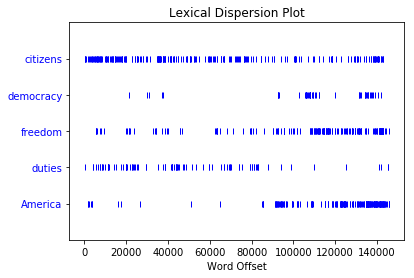

In [192]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [209]:
text3.generate(words)

In [196]:
len(text3)

44764

In [197]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [198]:
len(set(text3))

2789

In [199]:
len(set(text3)) / len(text3)

0.06230453042623537

In [200]:
text3.count("smote")

5

In [201]:
100 * text4.count('a') / len(text4)

1.4643016433938312

In [202]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [203]:
def percentage(count, total):
    return 100 * count / total

In [204]:
lexical_diversity(text3)

0.06230453042623537

In [205]:
lexical_diversity(text5)

0.13477005109975562

In [206]:
percentage(4, 5)

80.0

In [207]:
percentage(text4.count('a'), len(text4))

1.4643016433938312